# Time2Feat - An exploratory approach

In [1]:
from cookie_clusters import *

In [2]:
import os
import sys
import pickle

# Here, change the local Python PATH !!!

In [3]:
PATH_TO_PYTHON = "/home/julian/FilRouge_territoires"

In [4]:
sys.path
sys.path.append(PATH_TO_PYTHON)
sys.path

['/home/julian/FilRouge_territoires/notebooks',
 '/home/julian/miniconda3/envs/FilRouge/lib/python39.zip',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9/lib-dynload',
 '',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages',
 '/home/julian/FilRouge_territoires']

In [5]:
# file = open('../data/processed/pixels_de_interet_dic.pkl', 'rb')
# dic_de_pixels = pickle.load(file)
# file.close()

file = open('../data/processed/pixels_de_interet_list.pkl', 'rb')
pixels_de_interet = pickle.load(file)
file.close()

data_cube = np.loadtxt('../data/processed/(1000, 141, 8).csv', delimiter=",").astype(np.float32)
data_cube = data_cube.reshape(1000, 141, 8)

In [6]:
data_cube.shape

(1000, 141, 8)

In [7]:
import multiprocessing as mp

mp.cpu_count()

12

In [8]:
from t2f.extraction.extractor import feature_extraction
from t2f.utils.importance_old import feature_selection
from t2f.model.clustering import ClusterWrapper

# Feature extraction T2F
df_feats_i = feature_extraction(data_cube, batch_size=100, p=6)
display(df_feats_i.shape)

Feature Extraction: 100%|██████████| 528/528 [00:48<00:00, 10.90it/s]


(1000, 6488)

In [9]:
model_type = 'KMeans' # 'Hierarchical' 'KMeans' 
transform_type = 'std'# 'minmax' 'std' 'robust'
labels = {} # There's possible to use the semi-supervised approach !!!

# Feature Selection
context = {'model_type': model_type, 'transform_type': transform_type}
top_feats = feature_selection(df_feats_i, labels=labels, context=context)
df_feats = df_feats_i[top_feats]

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureW

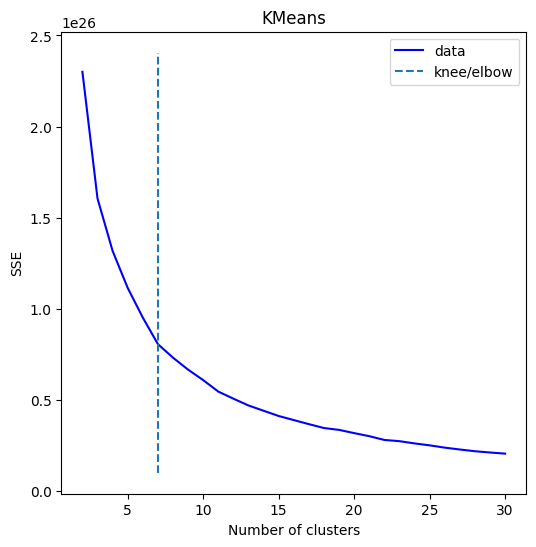

In [10]:
from cookie_clusters import find_num_clusters as fn
n_clusters = fn(data = df_feats, model_type = model_type, k_min = 2, k_max = 30, plot_elbow = True)

In [11]:
# Clustering
model = ClusterWrapper(n_clusters=n_clusters, model_type=model_type, transform_type=transform_type)
yhat = model.fit_predict(df_feats)
print(yhat.shape)

(1000,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


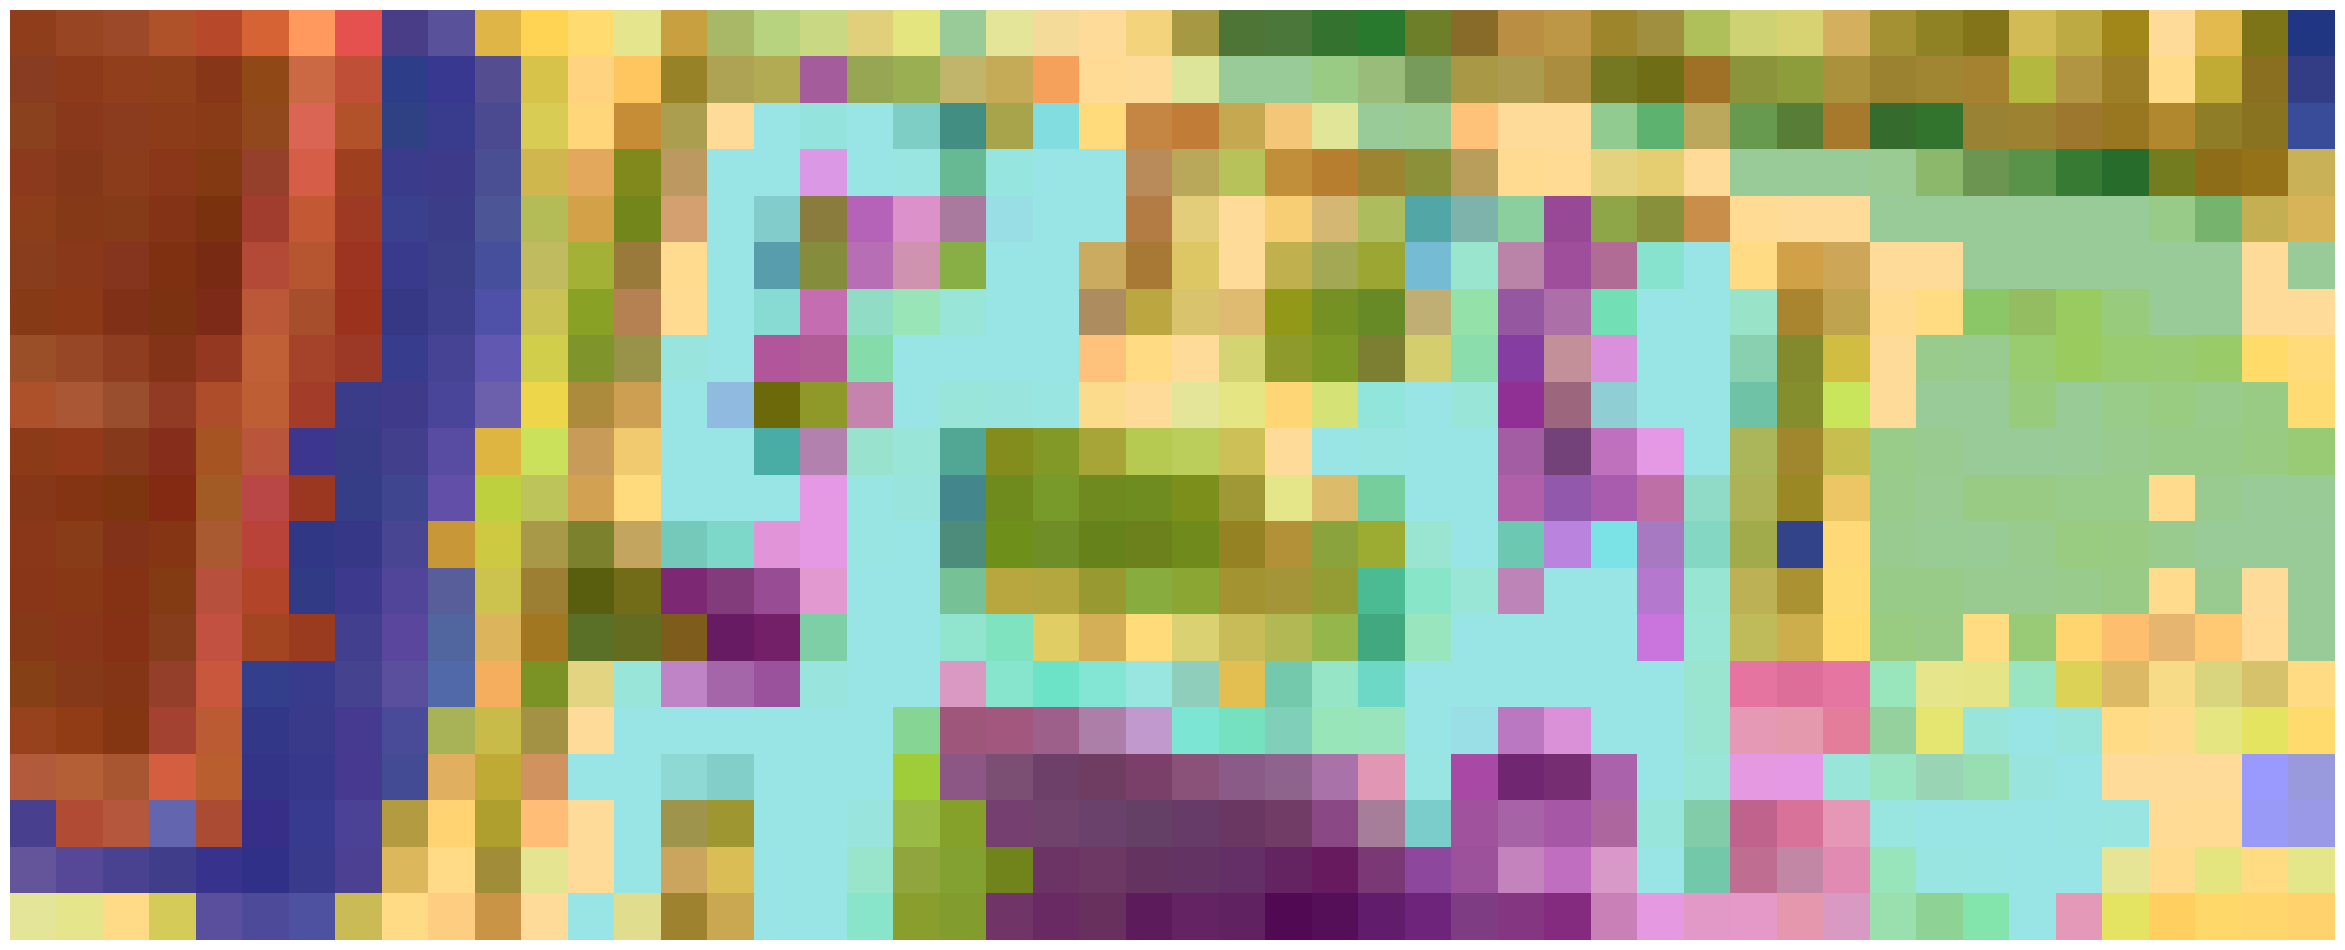

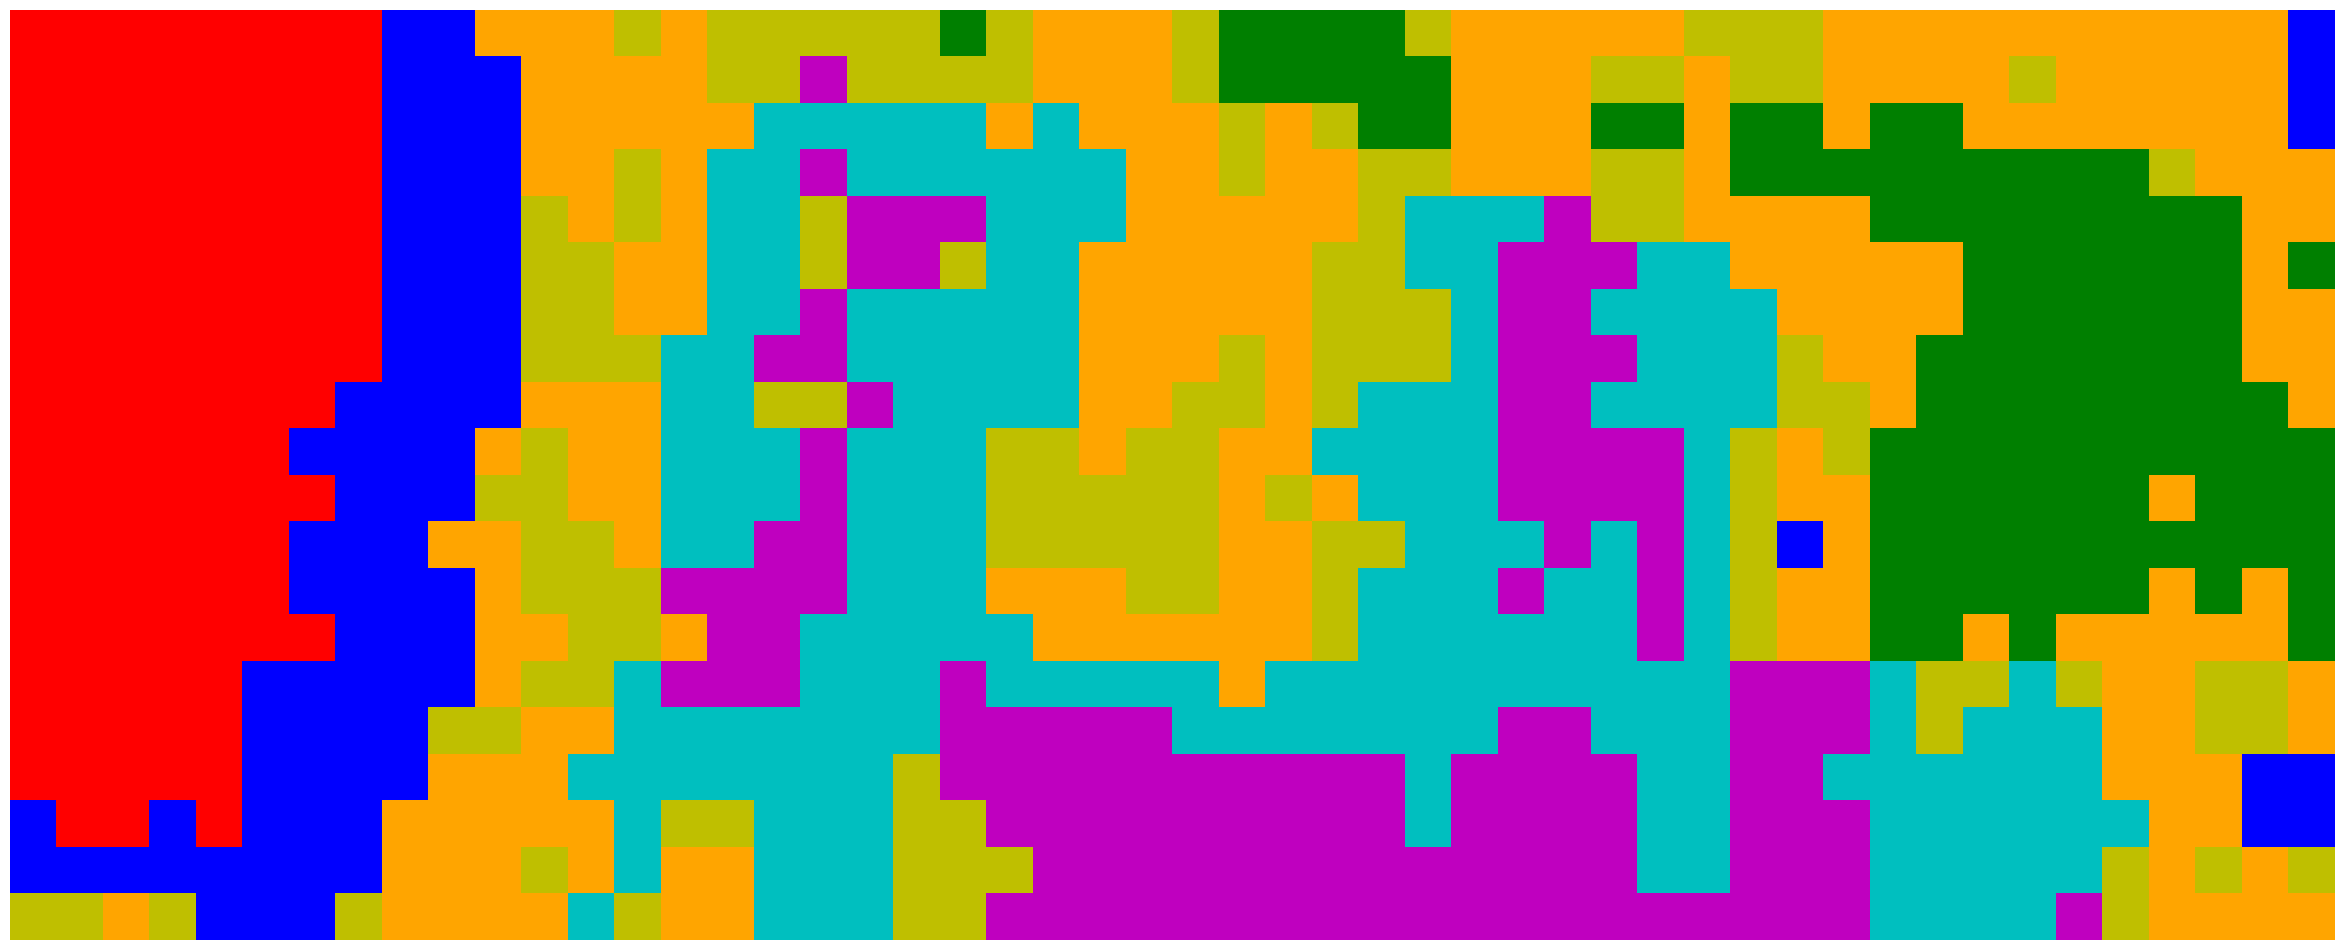

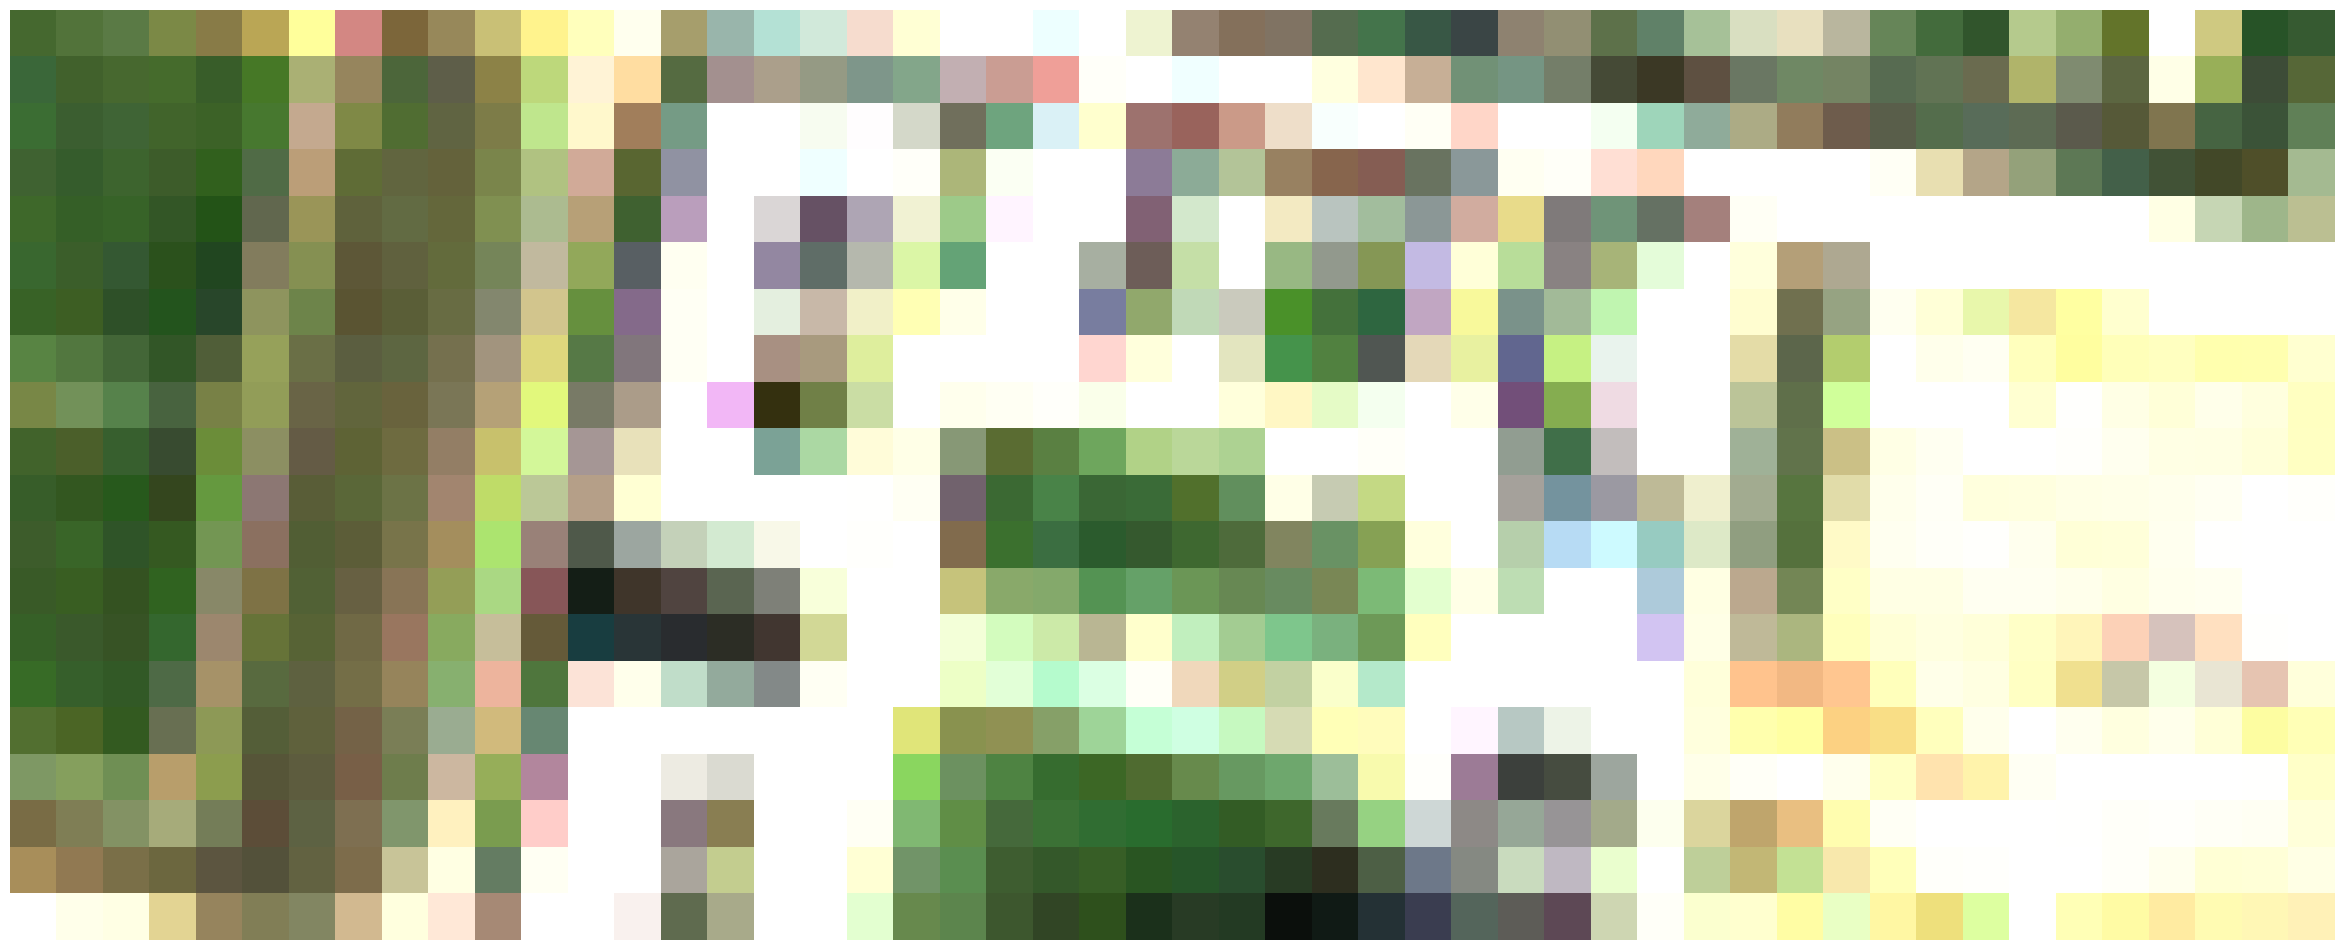

In [12]:
PATH_IMAGE = "/home/julian/FilRouge_territoires/data/cropped/cropped_with_texture_crop_SENTINEL2B_20231007-105728-915_L2A_T31UDQ_C_V3-1.tif"

results = afficheur_de_resultats(PATH_IMAGE, yhat, pixels_de_interet)
results.create_image('../results/just_a_test_1000', cbar=False, axes=False)